In [7]:
import pandas as pd
df = pd.read_csv("C:/T/b_2101.csv", encoding = "cp949")
selected_stations = [500, 501, 502, 505, 515, 516, 539, 540, 542, 543, 544, 546, 548, 549, 
                     551, 552, 553, 555, 571, 573, 574, 575, 576, 577, 584, 588, 590, 591,
                     592, 593, 3500, 3501, 3502, 3503, 3504, 3505, 3506, 3507, 3508, 3509, 
                     3510, 3516, 3517, 3518, 3520, 3521, 3523, 3528, 3529, 3533, 3534, 3536, 
                     3537, 3542, 3543, 3563, 3566, 3569, 3570, 3571, 3573, 3575, 3579, 3581, 
                     3582, 3586, 3587, 3588, 3853, 3860, 3863, 3864, 3865, 3868, 3873, 3878, 
                     3879, 3880, 3881, 3882, 3886, 3890]

filtered_df = df[df["대여소번호"].isin(selected_stations)]

In [12]:
import pandas as pd

# 선택된 대여소 번호 리스트
selected_stations = [500, 501, 502, 505, 515, 516, 539, 540, 542, 543, 544, 546, 548, 549, 
                     551, 552, 553, 555, 571, 573, 574, 575, 576, 577, 584, 588, 590, 591,
                     592, 593, 3500, 3501, 3502, 3503, 3504, 3505, 3506, 3507, 3508, 3509, 
                     3510, 3516, 3517, 3518, 3520, 3521, 3523, 3528, 3529, 3533, 3534, 3536, 
                     3537, 3542, 3543, 3563, 3566, 3569, 3570, 3571, 3573, 3575, 3579, 3581, 
                     3582, 3586, 3587, 3588, 3853, 3860, 3863, 3864, 3865, 3868, 3873, 3878, 
                     3879, 3880, 3881, 3882, 3886, 3890]

# 반복문을 통해 각 파일을 처리
for month in range(11, 13):  # 1월(s_2101)부터 12월(s_2112)까지 반복
    file_path = f"C:/T/b_21{month:02d}.csv"  # 파일 경로 생성
    try:
        # CSV 파일 읽기
        df = pd.read_csv(file_path)

        # 대여소번호 필터링
        filtered_df = df[df["대여소번호"].isin(selected_stations)]

        # 새로운 CSV 파일로 저장
        save_path = f"C:/T/filtered_s_21{month:02d}.csv"
        filtered_df.to_csv(save_path, index=False, encoding="cp949")

        print(f"파일 저장 완료: {save_path}")

    except FileNotFoundError:
        print(f"파일 없음: {file_path}")
    except Exception as e:
        print(f"오류 발생: {file_path} - {e}")


파일 저장 완료: C:/T/filtered_s_2111.csv
파일 저장 완료: C:/T/filtered_s_2112.csv


전처리

In [2]:
import pandas as pd

# 두 파일 읽기
all_bike = pd.read_csv("C:/T/all_bike_day.csv", encoding='utf-8')
july_data = pd.read_csv("C:/T/s_2307.csv", encoding='cp949')

# 데이터 합치기
combined_data = pd.concat([all_bike, july_data], ignore_index=True)


print("\n=== 합친 후 데이터 정보 ===")
print(f"전체 행 수: {len(combined_data)}")
print(f"전체 열 수: {len(combined_data.columns)}")

# 새로운 CSV 파일로 저장
output_path = "C:/T/combined_bike_data.csv"
combined_data.to_csv(output_path, index=False, encoding='cp949')
print(f"\n파일이 저장되었습니다: {output_path}")

C:\Users\peter\AppData\Local\Temp\ipykernel_16196\2918231276.py:4: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  all_bike = pd.read_csv("C:/T/all_bike_day.csv", encoding='utf-8')



=== 합친 후 데이터 정보 ===
전체 행 수: 3114937
전체 열 수: 11

파일이 저장되었습니다: C:/T/combined_bike_data.csv


In [4]:
import pandas as pd
data = pd.read_csv("../combined_bike_data.csv",encoding='cp949')

C:\Users\peter\AppData\Local\Temp\ipykernel_16196\3634309931.py:2: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../combined_bike_data.csv",encoding='cp949')


결측치 / 중복값 확인

In [5]:
# 결측치 확인
print("=== 결측치 확인 ===")
print(data.isnull().sum())
print("\n전체 결측치 수:", data.isnull().sum().sum())

# 중복 데이터 확인
print("\n=== 중복 데이터 확인 ===")
print("중복 행 수:", data.duplicated().sum())

# 데이터 기본 정보 확인
print("\n=== 데이터 기본 정보 ===")
print(data.info())

=== 결측치 확인 ===
대여일자            0
대여소번호           0
대여소             0
대여구분코드          0
성별         831321
연령대             0
이용건수            0
운동량          1361
탄소량          1361
이동거리(M)         0
이용시간(분)         0
dtype: int64

전체 결측치 수: 834043

=== 중복 데이터 확인 ===
중복 행 수: 86848

=== 데이터 기본 정보 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114937 entries, 0 to 3114936
Data columns (total 11 columns):
 #   Column   Dtype  
---  ------   -----  
 0   대여일자     object 
 1   대여소번호    int64  
 2   대여소      object 
 3   대여구분코드   object 
 4   성별       object 
 5   연령대      object 
 6   이용건수     int64  
 7   운동량      object 
 8   탄소량      object 
 9   이동거리(M)  float64
 10  이용시간(분)  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 261.4+ MB
None


중복값 제거

In [6]:
# 중복 제거 전 데이터 개수 확인
print("중복 제거 전 데이터 개수:", len(data))

# 중복값 제거 (첫 번째 발생 데이터 유지)
data = data.drop_duplicates(keep='first')

# 중복 제거 후 데이터 개수 확인
print("중복 제거 후 데이터 개수:", len(data))

# 중복 제거 확인
print("\n=== 중복 확인 ===")
print("남은 중복 행 수:", data.duplicated().sum())

# 데이터 기본 정보 확인
print("\n=== 데이터 기본 정보 ===")
print(data.info())

중복 제거 전 데이터 개수: 3114937
중복 제거 후 데이터 개수: 3028089

=== 중복 확인 ===
남은 중복 행 수: 0

=== 데이터 기본 정보 ===
<class 'pandas.core.frame.DataFrame'>
Index: 3028089 entries, 0 to 3114936
Data columns (total 11 columns):
 #   Column   Dtype  
---  ------   -----  
 0   대여일자     object 
 1   대여소번호    int64  
 2   대여소      object 
 3   대여구분코드   object 
 4   성별       object 
 5   연령대      object 
 6   이용건수     int64  
 7   운동량      object 
 8   탄소량      object 
 9   이동거리(M)  float64
 10  이용시간(분)  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 277.2+ MB
None


이용건수 전처리

In [7]:
# 이용건수의 기본 통계량
print("=== 이용건수 기본 통계량 ===")
print(f"최소값: {data['이용건수'].min()}")
print(f"최대값: {data['이용건수'].max()}")
print(f"평균값: {data['이용건수'].mean():.2f}")

=== 이용건수 기본 통계량 ===
최소값: 1
최대값: 215
평균값: 2.47


1명의 고객이 하루에 이용한 건수를 의미하는데 10회 이상은 이상치라 판단

=== 이용건수 10 초과 데이터 통계 ===
데이터 수: 74339
전체 데이터 중 비율: 2.45%
최소값: 11
최대값: 215
평균값: 16.90


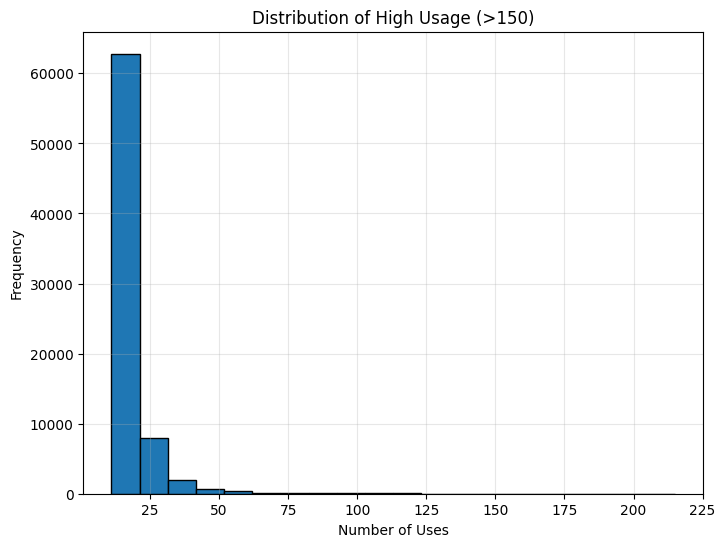


=== 이용건수 상위 10개 데이터 ===
         이용건수
681339    215
109620    212
681329    201
1528427   186
89603     182
127375    182
121833    180
634422    174
91117     173
632432    160


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 이용건수가 10 초과인 데이터 추출
high_usage = data[data['이용건수'] > 10]

# 기본 통계량 출력
print("=== 이용건수 10 초과 데이터 통계 ===")
print(f"데이터 수: {len(high_usage)}")
print(f"전체 데이터 중 비율: {(len(high_usage) / len(data)) * 100:.2f}%")
print(f"최소값: {high_usage['이용건수'].min()}")
print(f"최대값: {high_usage['이용건수'].max()}")
print(f"평균값: {high_usage['이용건수'].mean():.2f}")

# 히스토그램 
plt.figure(figsize=(8, 6))
plt.hist(high_usage['이용건수'], bins=20, edgecolor='black')
plt.title('Distribution of High Usage (>150)')
plt.xlabel('Number of Uses')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

# 상위 데이터 출력
print("\n=== 이용건수 상위 10개 데이터 ===")
print(high_usage.sort_values('이용건수', ascending=False)[['이용건수']].head(10))

이용건수와 이용시간 상관관계

=== 이용건수 10 초과 데이터의 이용시간(분) 통계 ===
데이터 수: 74339
최소 이용시간(분): 32.00
최대 이용시간(분): 11379.00
평균 이용시간(분): 350.76


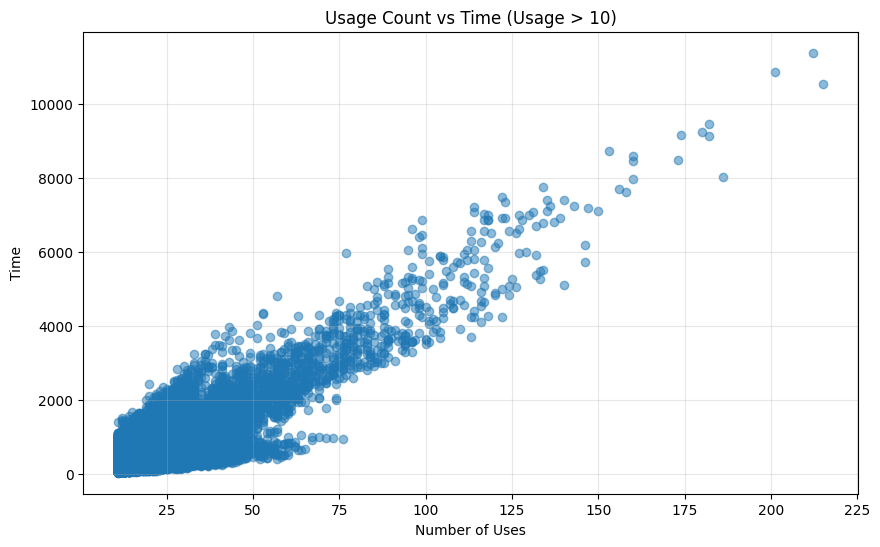

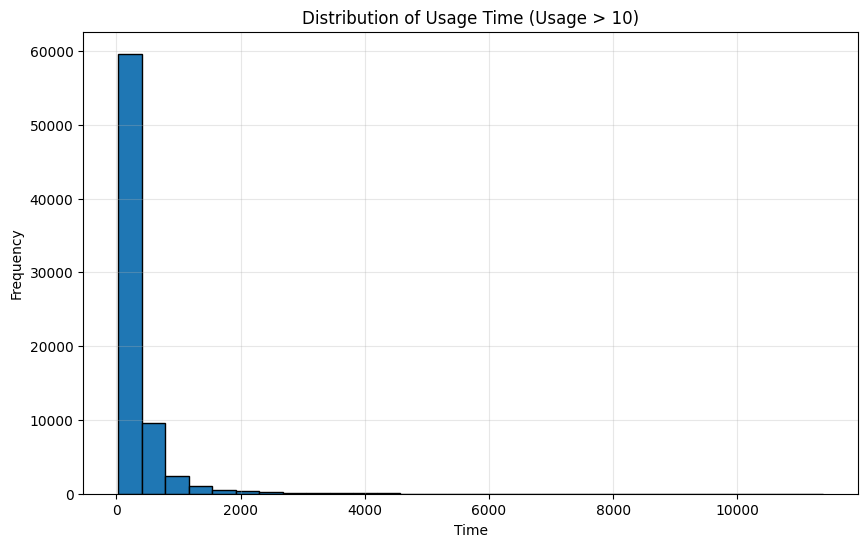

In [ ]:
# 이용건수가 10 초과인 데이터 추출
high_usage = data[data['이용건수'] > 10]

# 이용시간(분) 기본 통계량
print("=== 이용건수 10 초과 데이터의 이용시간(분) 통계 ===")
print(f"데이터 수: {len(high_usage)}")
print(f"최소 이용시간(분): {high_usage['이용시간(분)'].min():.2f}")
print(f"최대 이용시간(분): {high_usage['이용시간(분)'].max():.2f}")
print(f"평균 이용시간(분): {high_usage['이용시간(분)'].mean():.2f}")

# 산점도 (이용건수 vs 이용시간(분))
plt.figure(figsize=(10, 6))
plt.scatter(high_usage['이용건수'], high_usage['이용시간(분)'], alpha=0.5)
plt.title('Usage Count vs Time (Usage > 10)')
plt.xlabel('Number of Uses')
plt.ylabel('Time')
plt.grid(True, alpha=0.3)
plt.show()

# 이용시간(분) 히스토그램
plt.figure(figsize=(10, 6))
plt.hist(high_usage['이용시간(분)'], bins=30, edgecolor='black')
plt.title('Distribution of Usage Time (Usage > 10)')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

따릉이 1회 이용시 최대가 120분, 2회 최대로 이용시 240분 따릉이 4시간 이상 타는 경우는 이상치라 판단

In [10]:
# 이용이용시간(분)이 240 이상인 데이터 추출
long_usage = data[data['이용시간(분)'] >= 240]

# 데이터 개수 및 기본 통계
print("=== 이용이용시간(분) 240분 이상 데이터 ===")
print(f"데이터 개수: {len(long_usage)}")
print(f"전체 데이터 중 비율: {(len(long_usage) / len(data)) * 100:.2f}%")
print(f"\n최소 이용시간(분): {long_usage['이용시간(분)'].min():.2f}")
print(f"최대 이용시간(분): {long_usage['이용시간(분)'].max():.2f}")
print(f"평균 이용시간(분): {long_usage['이용시간(분)'].mean():.2f}")

=== 이용이용시간(분) 240분 이상 데이터 ===
데이터 개수: 76932
전체 데이터 중 비율: 2.54%

최소 이용시간(분): 240.00
최대 이용시간(분): 11379.00
평균 이용시간(분): 438.75


In [12]:
# 삭제 전 데이터 개수 확인
print("=== 데이터 삭제 전후 비교 ===")
print(f"삭제 전 데이터 개수: {len(data)}")

# 이용시간이 240분을 초과하거나 또는 이용건수가 10을 초과하는 데이터 필터링
data = data[~((data['이용시간(분)'] > 240) | (data['이용건수'] > 10))]

# 삭제 후 데이터 개수 확인
print(f"삭제 후 데이터 개수: {len(data)}")

# 수정된 데이터의 시간 통계
print("\n=== 수정된 데이터의 시간 통계 ===")
print(f"최소 시간: {data['이용시간(분)'].min():.2f}")
print(f"최대 시간: {data['이용시간(분)'].max():.2f}")
print(f"평균 시간: {data['이용시간(분)'].mean():.2f}")

=== 데이터 삭제 전후 비교 ===
삭제 전 데이터 개수: 3028089
삭제 후 데이터 개수: 2912355

=== 수정된 데이터의 시간 통계 ===
최소 시간: 0.00
최대 시간: 240.00
평균 시간: 42.01


이용시간이 0인 데이터 제거

In [13]:
# 이용시간이 0인 데이터 추출
zero_time = data[data['이용시간(분)'] == 0]

# 이용시간 0인 데이터 개수와 비율
print("=== 이용시간 0인 데이터 ===")
print(f"데이터 개수: {len(zero_time)}")
print(f"전체 데이터 중 비율: {(len(zero_time) / len(data)) * 100:.2f}%")

# 이용시간 0인 데이터의 이용건수 통계
print("\n=== 이용시간 0인 데이터의 이용건수 통계 ===")
print(f"최소 이용건수: {zero_time['이용건수'].min()}")
print(f"최대 이용건수: {zero_time['이용건수'].max()}")
print(f"평균 이용건수: {zero_time['이용건수'].mean():.2f}")

# 처음 몇 개의 데이터 확인
print("\n=== 이용시간 0인 데이터 예시 ===")
print(zero_time.head())

=== 이용시간 0인 데이터 ===
데이터 개수: 1338
전체 데이터 중 비율: 0.05%

=== 이용시간 0인 데이터의 이용건수 통계 ===
최소 이용건수: 1
최대 이용건수: 3
평균 이용건수: 1.02

=== 이용시간 0인 데이터 예시 ===
             대여일자  대여소번호             대여소 대여구분코드   성별      연령대  이용건수   운동량  \
3744   2021-01-06   3582    3582.화양동 우체국     정기    M  AGE_004     1     0   
5856   2021-01-13    516    516. 광진메디칼 앞     정기    M  AGE_002     1  2.58   
7047   2021-01-15    501    501. 광진구의회 앞     정기    F  AGE_002     1     0   
8177   2021-01-16   3529  3529. 어린이대공원정문     정기    M  AGE_002     1     0   
16873  2021-01-28   3569     3569.건대병원후문     정기  NaN  AGE_003     1  2.16   

        탄소량  이동거리(M)  이용시간(분)  
3744      0     0.00        0  
5856   0.02    88.16        0  
7047      0     0.00        0  
8177      0     0.00        0  
16873  0.02    88.17        0  


In [14]:
# 삭제 전 데이터 개수 확인
print("=== 데이터 삭제 전후 비교 ===")
print(f"삭제 전 데이터 개수: {len(data)}")

# 이용시간이 0인 데이터 삭제
data = data[data['이용시간(분)'] > 0]

# 삭제 후 데이터 개수 확인
print(f"삭제 후 데이터 개수: {len(data)}")

# 수정된 데이터의 이용시간 통계
print("\n=== 수정된 데이터의 이용시간 통계 ===")
print(f"최소 시간: {data['이용시간(분)'].min():.2f}")
print(f"최대 시간: {data['이용시간(분)'].max():.2f}")
print(f"평균 시간: {data['이용시간(분)'].mean():.2f}")

=== 데이터 삭제 전후 비교 ===
삭제 전 데이터 개수: 2912355
삭제 후 데이터 개수: 2911017

=== 수정된 데이터의 이용시간 통계 ===
최소 시간: 1.00
최대 시간: 240.00
평균 시간: 42.03


이동거리가 너무 적은 데이터 제거 최소 20m 이상을 정상으로 판단

In [15]:
# 이동거리가 0인 데이터 추출
zero_distance = data[data['이동거리(M)'] == 0]

# 이동거리 0인 데이터 개수와 비율
print("=== 이동거리 0인 데이터 ===")
print(f"데이터 개수: {len(zero_distance)}")
print(f"전체 데이터 중 비율: {(len(zero_distance) / len(data)) * 100:.2f}%")

# 이동거리 0인 데이터의 다른 변수 통계
print("\n=== 이동거리 0인 데이터의 통계 ===")
print("이용시간 통계:")
print(f"최소: {zero_distance['이용시간(분)'].min():.2f}")
print(f"최대: {zero_distance['이용시간(분)'].max():.2f}")
print(f"평균: {zero_distance['이용시간(분)'].mean():.2f}")

print("\n이용건수 통계:")
print(f"최소: {zero_distance['이용건수'].min()}")
print(f"최대: {zero_distance['이용건수'].max()}")
print(f"평균: {zero_distance['이용건수'].mean():.2f}")

# 처음 몇 개의 데이터 확인
print("\n=== 이동거리 0인 데이터 예시 ===")
print(zero_distance.head())

=== 이동거리 0인 데이터 ===
데이터 개수: 71534
전체 데이터 중 비율: 2.46%

=== 이동거리 0인 데이터의 통계 ===
이용시간 통계:
최소: 1.00
최대: 240.00
평균: 18.23

이용건수 통계:
최소: 1
최대: 5
평균: 1.06

=== 이동거리 0인 데이터 예시 ===
         대여일자  대여소번호                  대여소  대여구분코드   성별      연령대  이용건수 운동량 탄소량  \
1  2021-01-01    500  500. 어린이대공원역 3번출구 앞  일일(회원)   \N  AGE_004     1   0   0   
2  2021-01-01    500  500. 어린이대공원역 3번출구 앞  일일(회원)  NaN  AGE_002     1   0   0   
3  2021-01-01    500  500. 어린이대공원역 3번출구 앞  일일(회원)    F  AGE_002     2   0   0   
6  2021-01-01    500  500. 어린이대공원역 3번출구 앞  일일(회원)    M  AGE_004     1   0   0   
8  2021-01-01    500  500. 어린이대공원역 3번출구 앞      정기   \N  AGE_003     1   0   0   

   이동거리(M)  이용시간(분)  
1      0.0       24  
2      0.0       78  
3      0.0      119  
6      0.0       10  
8      0.0        7  


In [16]:
# 각 거리 기준별 데이터 수 확인
distances = [10, 20, 30, 40, 50]

print("=== 각 거리 이하 데이터 수 ===")
for dist in distances:
    count = len(data[data['이동거리(M)'] <= dist])
    percentage = (count / len(data)) * 100
    print(f"{dist}m 이하: {count}개 ({percentage:.2f}%)")

# 각 구간별 데이터 수 확인
print("\n=== 거리 구간별 데이터 수 ===")
prev_dist = 0
for dist in distances:
    count = len(data[(data['이동거리(M)'] >= prev_dist) & (data['이동거리(M)'] <= dist)])
    percentage = (count / len(data)) * 100
    print(f"{prev_dist}m ~ {dist}m: {count}개 ({percentage:.2f}%)")
    prev_dist = dist

# 기본 통계
print("\n=== 전체 데이터 통계 ===")
print(f"전체 데이터 수: {len(data)}")
print(f"평균 이동거리: {data['이동거리(M)'].mean():.2f}m")

=== 각 거리 이하 데이터 수 ===
10m 이하: 73352개 (2.52%)
20m 이하: 74084개 (2.54%)
30m 이하: 74764개 (2.57%)
40m 이하: 75351개 (2.59%)
50m 이하: 75981개 (2.61%)

=== 거리 구간별 데이터 수 ===
0m ~ 10m: 73352개 (2.52%)
10m ~ 20m: 1431개 (0.05%)
20m ~ 30m: 1128개 (0.04%)
30m ~ 40m: 971개 (0.03%)
40m ~ 50m: 956개 (0.03%)

=== 전체 데이터 통계 ===
전체 데이터 수: 2911017
평균 이동거리: 4744.22m


In [17]:
# 삭제 전 데이터 개수 확인
print("=== 데이터 삭제 전후 비교 ===")
print(f"삭제 전 데이터 개수: {len(data)}")

# 이동거리가 20m 이하인 데이터 삭제
data = data[data['이동거리(M)'] > 20]

# 삭제 후 데이터 개수 확인
print(f"삭제 후 데이터 개수: {len(data)}")

# 수정된 데이터의 이동거리 통계
print("\n=== 수정된 데이터의 이동거리 통계 ===")
print(f"최소 거리: {data['이동거리(M)'].min():.2f}m")
print(f"최대 거리: {data['이동거리(M)'].max():.2f}m")
print(f"평균 거리: {data['이동거리(M)'].mean():.2f}m")

=== 데이터 삭제 전후 비교 ===
삭제 전 데이터 개수: 2911017
삭제 후 데이터 개수: 2836933

=== 수정된 데이터의 이동거리 통계 ===
최소 거리: 20.01m
최대 거리: 373661.29m
평균 거리: 4868.10m


In [18]:
# 삭제 전 데이터 개수 확인
print("=== 데이터 삭제 전후 비교 ===")
print(f"삭제 전 데이터 개수: {len(data)}")

# 이동거리가 200,000m 이상인 데이터 삭제
data = data[data['이동거리(M)'] < 200000]

# 삭제 후 데이터 개수 확인
print(f"삭제 후 데이터 개수: {len(data)}")

# 수정된 데이터의 이동거리 통계
print("\n=== 수정된 데이터의 이동거리 통계 ===")
print(f"최소 거리: {data['이동거리(M)'].min():.2f}m")
print(f"최대 거리: {data['이동거리(M)'].max():.2f}m")
print(f"평균 거리: {data['이동거리(M)'].mean():.2f}m")

# 수정된 데이

=== 데이터 삭제 전후 비교 ===
삭제 전 데이터 개수: 2836933
삭제 후 데이터 개수: 2836931

=== 수정된 데이터의 이동거리 통계 ===
최소 거리: 20.01m
최대 거리: 145413.27m
평균 거리: 4867.88m


이동거리 분포

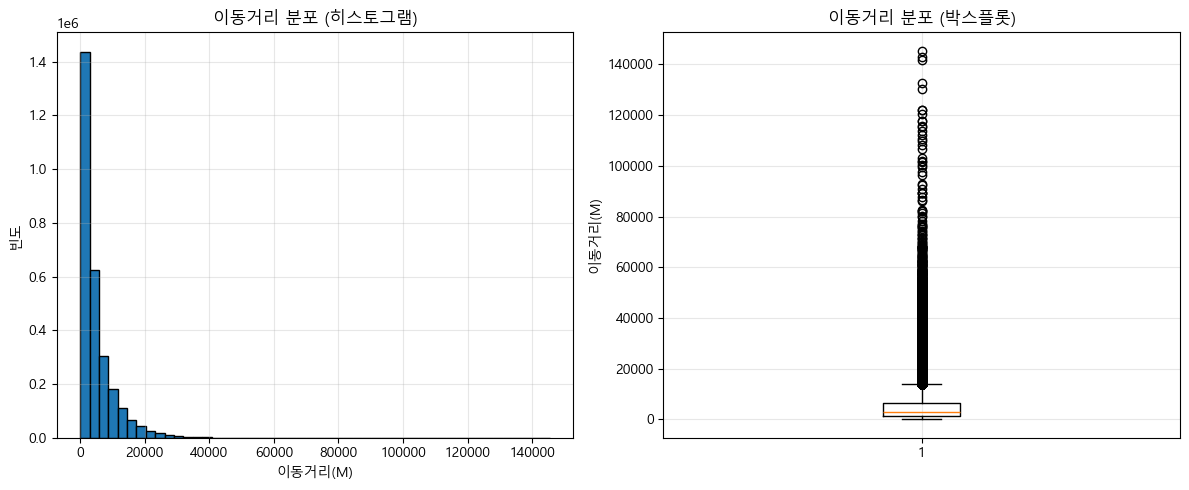


=== 이동거리 기본 통계 ===
평균: 4867.88m
중앙값: 2871.90m
표준편차: 5379.73m
최소값: 20.01m
최대값: 145413.27m


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# 1. 히스토그램
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(data['이동거리(M)'], bins=50, edgecolor='black')
plt.title('이동거리 분포 (히스토그램)')
plt.xlabel('이동거리(M)')
plt.ylabel('빈도')
plt.grid(True, alpha=0.3)

# 2. 박스플롯
plt.subplot(1, 2, 2)
plt.boxplot(data['이동거리(M)'])
plt.title('이동거리 분포 (박스플롯)')
plt.ylabel('이동거리(M)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 기본 통계 출력
print("\n=== 이동거리 기본 통계 ===")
print(f"평균: {data['이동거리(M)'].mean():.2f}m")
print(f"중앙값: {data['이동거리(M)'].median():.2f}m")
print(f"표준편차: {data['이동거리(M)'].std():.2f}m")
print(f"최소값: {data['이동거리(M)'].min():.2f}m")
print(f"최대값: {data['이동거리(M)'].max():.2f}m")

이동거리 100km 넘는 데이터 이상치로 판단

=== 100km 초과 이동거리 데이터 ===
데이터 수: 22
전체 데이터 중 비율: 0.001%

=== 100km 초과 데이터 통계 ===
최소 거리: 100.46km
최대 거리: 145.41km
평균 거리: 117.84km

=== 100km 초과 데이터 상세 정보 ===
               대여일자    이동거리(M)  이용시간(분)      연령대  대여구분코드
116336   2021-04-29  145413.27       71  AGE_003      정기
1294182  2023-08-07  143080.42      107      20대     정기권
280148   2021-08-13  141904.33        2     ~10대     정기권
2411767  2024-05-20  132599.10      159      20대     일일권
2236934  2024-03-23  130169.23       73      40대     정기권
3113255  2023-07-31  121882.19       31      40대     정기권
2422962  2024-05-23  121874.59       76      20대     정기권
88246    2021-04-09  120658.77      143  AGE_008      정기
63359    2021-03-18  117898.34      220  AGE_002  일일(회원)
81770    2021-04-04  117894.21      106  AGE_006      정기
80587    2021-04-02  115738.41      154  AGE_003      정기
229359   2021-07-18  115138.43      220       기타     정기권
257527   2021-08-02  113606.74       15      50대     정기권
93552    2021-04-13  112165.18       38  AGE_

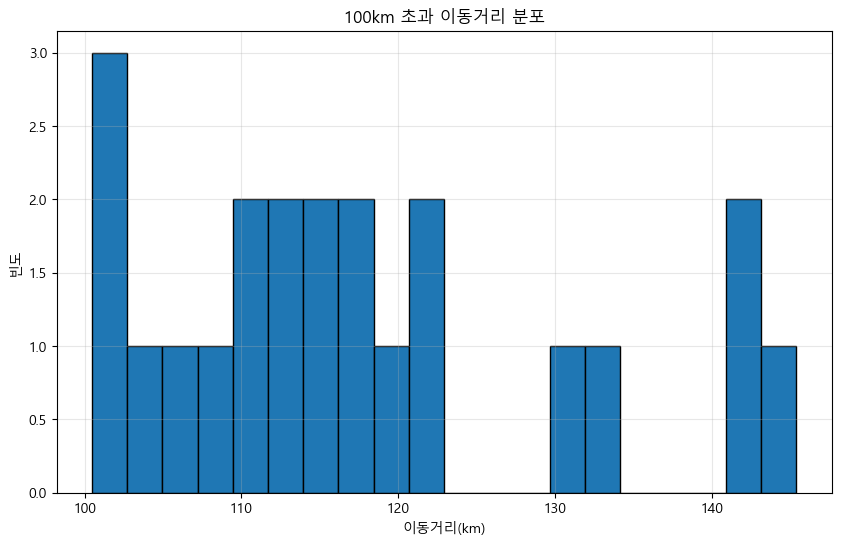

In [22]:
# 100km를 넘는 데이터 추출
long_distance = data[data['이동거리(M)'] > 100000]

print("=== 100km 초과 이동거리 데이터 ===")
print(f"데이터 수: {len(long_distance)}")
print(f"전체 데이터 중 비율: {(len(long_distance) / len(data)) * 100:.3f}%")

print("\n=== 100km 초과 데이터 통계 ===")
print(f"최소 거리: {long_distance['이동거리(M)'].min()/1000:.2f}km")
print(f"최대 거리: {long_distance['이동거리(M)'].max()/1000:.2f}km")
print(f"평균 거리: {long_distance['이동거리(M)'].mean()/1000:.2f}km")

# 상세 정보 출력
print("\n=== 100km 초과 데이터 상세 정보 ===")
print(long_distance[['대여일자', '이동거리(M)', '이용시간(분)', '연령대', '대여구분코드']].sort_values('이동거리(M)', ascending=False))

# 히스토그램
plt.figure(figsize=(10, 6))
plt.hist(long_distance['이동거리(M)']/1000, bins=20, edgecolor='black')
plt.title('100km 초과 이동거리 분포')
plt.xlabel('이동거리(km)')
plt.ylabel('빈도')
plt.grid(True, alpha=0.3)
plt.show()

=== 데이터 삭제 전후 비교 ===
삭제 전 데이터 수: 2836931
삭제 후 데이터 수: 2836909

=== 수정된 데이터의 이동거리 통계 ===
최소 거리: 0.02km
최대 거리: 99.40km
평균 거리: 4.87km


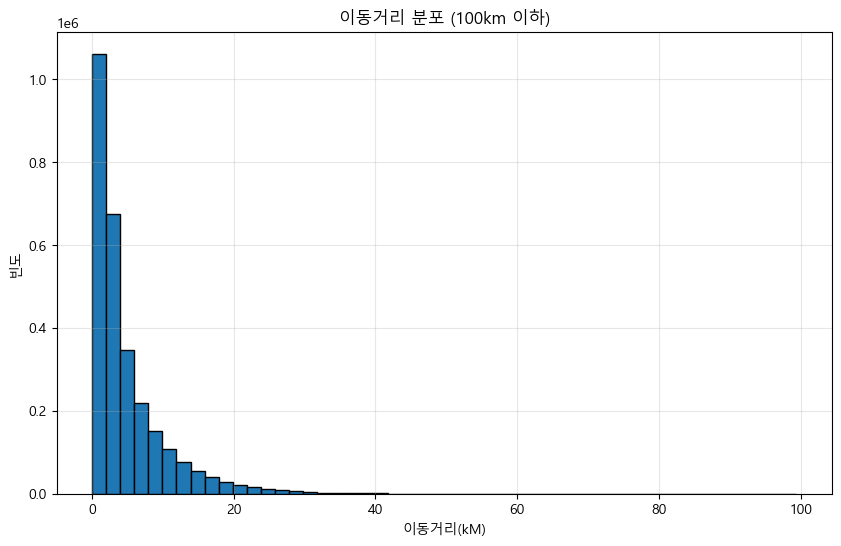

In [23]:
# 삭제 전 데이터 수 확인
print("=== 데이터 삭제 전후 비교 ===")
print(f"삭제 전 데이터 수: {len(data)}")

# 100km 초과 데이터 삭제
data = data[data['이동거리(M)'] <= 100000]

# 삭제 후 데이터 수 확인
print(f"삭제 후 데이터 수: {len(data)}")

# 수정된 데이터의 이동거리 통계
print("\n=== 수정된 데이터의 이동거리 통계 ===")
print(f"최소 거리: {data['이동거리(M)'].min()/1000:.2f}km")
print(f"최대 거리: {data['이동거리(M)'].max()/1000:.2f}km")
print(f"평균 거리: {data['이동거리(M)'].mean()/1000:.2f}km")

# 이동거리 분포 시각화
plt.figure(figsize=(10, 6))
plt.hist(data['이동거리(M)']/1000, bins=50, edgecolor='black')
plt.title('이동거리 분포 (100km 이하)')
plt.xlabel('이동거리(KM)')
plt.ylabel('빈도')
plt.grid(True, alpha=0.3)
plt.show()

In [24]:
# 삭제 전 데이터 개수 확인
print("=== 데이터 삭제 전후 비교 ===")
print(f"삭제 전 데이터 개수: {len(data)}")

# 운동량 또는 탄소량이 없는 데이터 삭제
data = data.dropna(subset=['운동량', '탄소량'])

# 삭제 후 데이터 개수 확인
print(f"삭제 후 데이터 개수: {len(data)}")

# 결측치 확인
print("\n=== 결측치 확인 ===")
print(data.isnull().sum())

# 기본 통계 확인
print("\n=== 남은 데이터 통계 ===")
print("\n운동량 통계:")
print(data['운동량'].describe())
print("\n탄소량 통계:")
print(data['탄소량'].describe())

=== 데이터 삭제 전후 비교 ===
삭제 전 데이터 개수: 2836909
삭제 후 데이터 개수: 2835795

=== 결측치 확인 ===
대여일자            0
대여소번호           0
대여소             0
대여구분코드          0
성별         756629
연령대             0
이용건수            0
운동량             0
탄소량             0
이동거리(M)         0
이용시간(분)         0
dtype: int64

=== 남은 데이터 통계 ===

운동량 통계:
count     2835795
unique     140278
top             0
freq         1906
Name: 운동량, dtype: object

탄소량 통계:
count     2835795
unique       2456
top          0.23
freq        31707
Name: 탄소량, dtype: object


대여구분코드 그룹핑

=== 대여구분코드 종류와 빈도 ===
대여구분코드
정기권         1888374
일일권          537684
정기           266100
일일(회원)        99790
일일권(비회원)      26573
단체권            7414
일일(비회원)        5532
단체             3918
BIL_021         410
Name: count, dtype: int64

=== 대여구분코드 비율(%) ===
대여구분코드
정기권         66.59
일일권         18.96
정기           9.38
일일(회원)       3.52
일일권(비회원)     0.94
단체권          0.26
일일(비회원)      0.20
단체           0.14
BIL_021      0.01
Name: proportion, dtype: float64


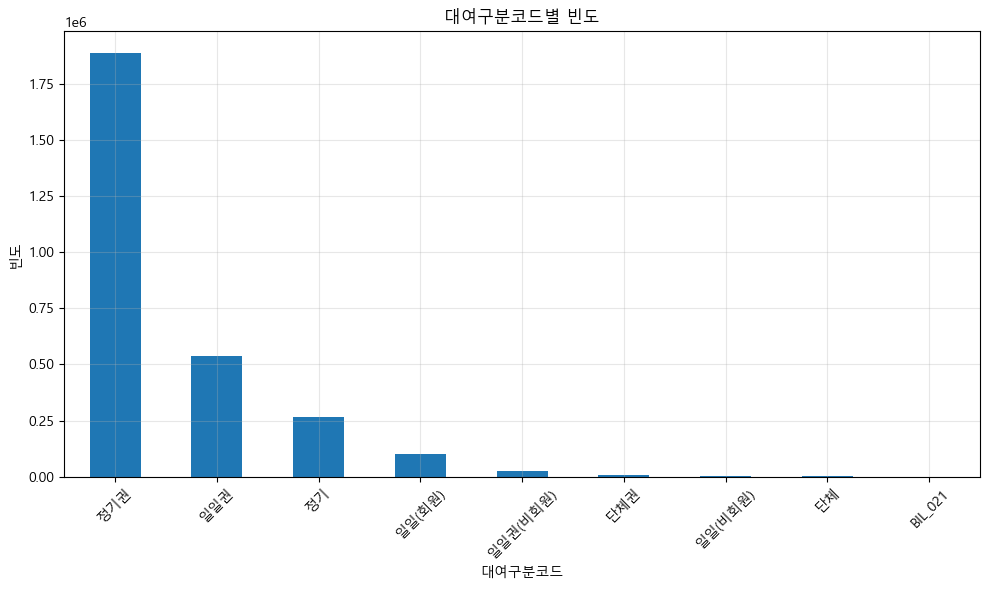

In [25]:
# 대여구분코드의 unique 값과 빈도 확인
print("=== 대여구분코드 종류와 빈도 ===")
code_counts = data['대여구분코드'].value_counts()
print(code_counts)

# 비율로 확인
print("\n=== 대여구분코드 비율(%) ===")
code_percentages = (data['대여구분코드'].value_counts(normalize=True) * 100).round(2)
print(code_percentages)

# 데이터 시각화
plt.figure(figsize=(10, 6))
code_counts.plot(kind='bar')
plt.title('대여구분코드별 빈도')
plt.xlabel('대여구분코드')
plt.ylabel('빈도')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
# BIL_021 데이터 추출
bil_021_data = data[data['대여구분코드'] == 'BIL_021']

# 기본 정보 출력
print("=== BIL_021 데이터 기본 정보 ===")
print(f"전체 건수: {len(bil_021_data)}")
print(f"전체 데이터 중 비율: {(len(bil_021_data) / len(data)) * 100:.2f}%")

# 기술 통계량
print("\n=== BIL_021 데이터 통계 ===")
print("\n이용시간 통계:")
print(f"평균: {bil_021_data['이용시간(분)'].mean():.2f}분")
print(f"최소: {bil_021_data['이용시간(분)'].min():.2f}분")
print(f"최대: {bil_021_data['이용시간(분)'].max():.2f}분")

print("\n이동거리 통계:")
print(f"평균: {bil_021_data['이동거리(M)'].mean():.2f}m")
print(f"최소: {bil_021_data['이동거리(M)'].min():.2f}m")
print(f"최대: {bil_021_data['이동거리(M)'].max():.2f}m")

# 처음 5개 데이터 확인
print("\n=== BIL_021 데이터 예시 (처음 5개) ===")
print(bil_021_data.head())

=== BIL_021 데이터 기본 정보 ===
전체 건수: 410
전체 데이터 중 비율: 0.01%

=== BIL_021 데이터 통계 ===

이용시간 통계:
평균: 10.68분
최소: 1.00분
최대: 177.00분

이동거리 통계:
평균: 1359.48m
최소: 88.17m
최대: 22132.24m

=== BIL_021 데이터 예시 (처음 5개) ===
            대여일자  대여소번호              대여소   대여구분코드  성별      연령대  이용건수    운동량  \
1368  2021-01-03    573    573. 구의문주차장 앞  BIL_021  \N  AGE_008     1  20.35   
1398  2021-01-03    576  576. 광나루역 3번 출구  BIL_021   M  AGE_002     1  20.53   
1984  2021-01-04    576  576. 광나루역 3번 출구  BIL_021   M  AGE_002     1  20.53   
4515  2021-01-09   3573    3573.광나루안전체험관  BIL_021  \N  AGE_008     1  45.43   
6116  2021-01-13   3518  3518. 군자역 7번출구뒤  BIL_021   M  AGE_004     1  21.28   

       탄소량  이동거리(M)  이용시간(분)  
1368   0.2   856.56        5  
1398   0.2   864.23        5  
1984   0.2   864.23        6  
4515  0.41  1764.92       15  
6116  0.17   736.22        5  


=== 변경 전 대여구분코드 종류 ===
['일일(회원)' '정기' '단체' '일일(비회원)' 'BIL_021' '정기권' '일일권' '일일권(비회원)' '단체권']

=== 변경 전 빈도 ===
대여구분코드
정기권         1888374
일일권          537684
정기           266100
일일(회원)        99790
일일권(비회원)      26573
단체권            7414
일일(비회원)        5532
단체             3918
BIL_021         410
Name: count, dtype: int64

=== 변경 후 대여구분코드 종류 ===
['일일권(회원)' '정기권(회원)' '일일권(비회원)']

=== 변경 후 빈도 ===
대여구분코드
정기권(회원)     2165806
일일권(회원)      637474
일일권(비회원)      32515
Name: count, dtype: int64


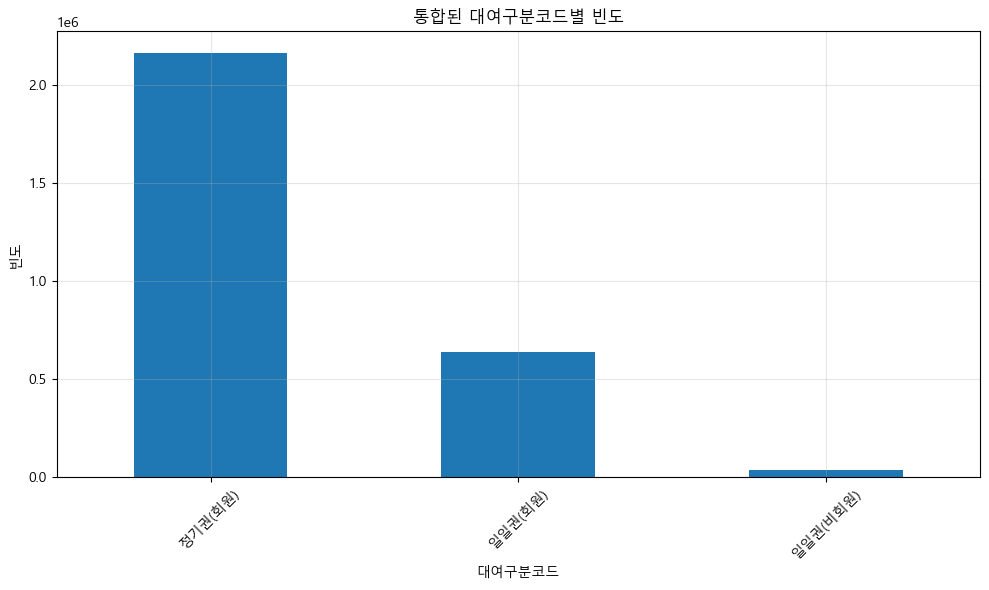

In [27]:
# 변경 전 고유값 확인
print("=== 변경 전 대여구분코드 종류 ===")
print(data['대여구분코드'].unique())
print("\n=== 변경 전 빈도 ===")
print(data['대여구분코드'].value_counts())

# 대여구분코드 통합
data['대여구분코드'] = data['대여구분코드'].replace({
    '정기권': '정기권(회원)',
    '정기': '정기권(회원)',
    '단체': '정기권(회원)',
    '단체권': '정기권(회원)',
    '일일권': '일일권(회원)',
    '일일(회원)': '일일권(회원)',
    'BIL_021' : '일일권(비회원)',
    '일일권(비회원)': '일일권(비회원)',
    '일일(비회원)': '일일권(비회원)'
})

# 변경 후 확인
print("\n=== 변경 후 대여구분코드 종류 ===")
print(data['대여구분코드'].unique())
print("\n=== 변경 후 빈도 ===")
print(data['대여구분코드'].value_counts())

# 시각화
plt.figure(figsize=(10, 6))
data['대여구분코드'].value_counts().plot(kind='bar')
plt.title('통합된 대여구분코드별 빈도')
plt.xlabel('대여구분코드')
plt.ylabel('빈도')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

연령대 그룹핑

=== 대여구분코드 종류와 빈도 ===
연령대
20대        713085
30대        590167
40대        392901
기타         315195
50대        286945
~10대       166024
60대        103877
AGE_002     68608
AGE_003     50687
AGE_004     36306
AGE_005     26401
AGE_008     25947
10대         20375
AGE_001     17696
70대이상       13023
AGE_006      7684
AGE_007       874
Name: count, dtype: int64

=== 연령대 비율(%) ===
연령대
20대        25.15
30대        20.81
40대        13.86
기타         11.11
50대        10.12
~10대        5.85
60대         3.66
AGE_002     2.42
AGE_003     1.79
AGE_004     1.28
AGE_005     0.93
AGE_008     0.91
10대         0.72
AGE_001     0.62
70대이상       0.46
AGE_006     0.27
AGE_007     0.03
Name: proportion, dtype: float64


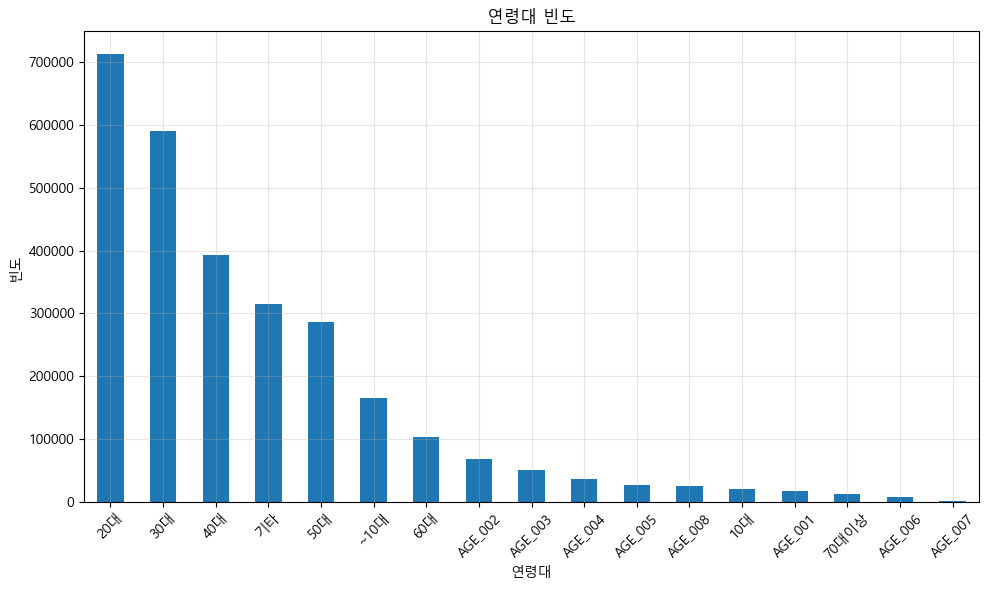

In [28]:
# 대여구분코드의 unique 값과 빈도 확인
print("=== 대여구분코드 종류와 빈도 ===")
code_counts = data['연령대'].value_counts()
print(code_counts)

# 비율로 확인
print("\n=== 연령대 비율(%) ===")
code_percentages = (data['연령대'].value_counts(normalize=True) * 100).round(2)
print(code_percentages)

# 데이터 시각화
plt.figure(figsize=(10, 6))
code_counts.plot(kind='bar')
plt.title('연령대 빈도')
plt.xlabel('연령대')
plt.ylabel('빈도')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

=== 변경 전 연령대 종류 ===
['AGE_002' 'AGE_003' 'AGE_004' 'AGE_008' 'AGE_001' 'AGE_005' 'AGE_006'
 'AGE_007' '~10대' '20대' '30대' '40대' '50대' '60대' '기타' '70대이상' '10대']

=== 변경 전 빈도 ===
연령대
20대        713085
30대        590167
40대        392901
기타         315195
50대        286945
~10대       166024
60대        103877
AGE_002     68608
AGE_003     50687
AGE_004     36306
AGE_005     26401
AGE_008     25947
10대         20375
AGE_001     17696
70대이상       13023
AGE_006      7684
AGE_007       874
Name: count, dtype: int64

=== 변경 후 연령대 종류 ===
['20대' '30대' '40대' '70_over' '10대' '50대' '60대' '~10대' '기타']

=== 변경 후 빈도 ===
연령대
20대        781693
30대        640854
40대        429207
기타         315195
50대        313346
~10대       166024
60대        111561
70_over     39844
10대         38071
Name: count, dtype: int64


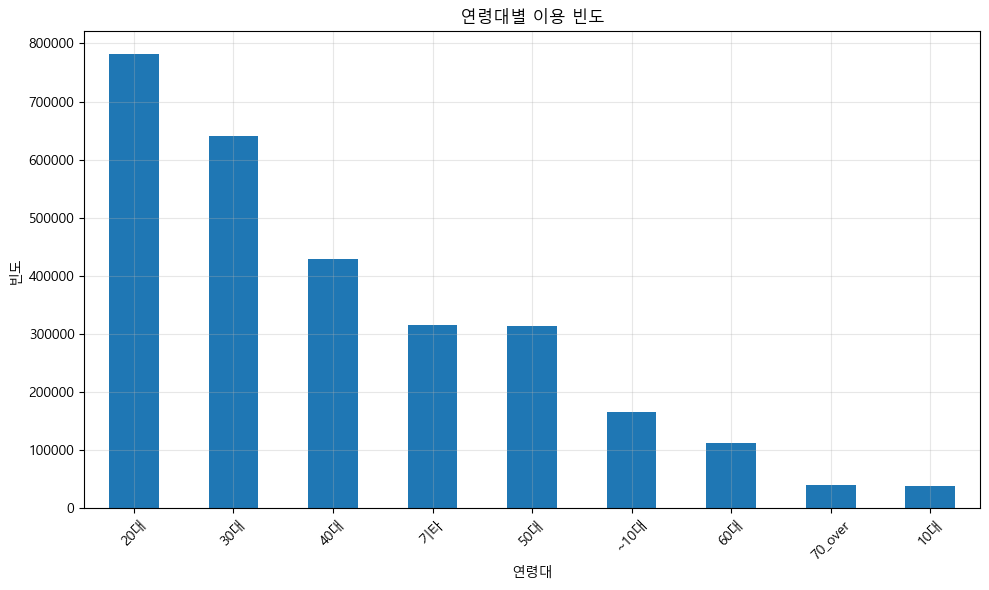

In [29]:
# 변경 전 고유값 확인
print("=== 변경 전 연령대 종류 ===")
print(data['연령대'].unique())
print("\n=== 변경 전 빈도 ===")
print(data['연령대'].value_counts())

# 연령대 통합 및 변경
data['연령대'] = data['연령대'].replace({
    'AGE_002': '20대',
    'AGE_003': '30대',
    'AGE_004': '40대',
    'AGE_005': '50대',
    'AGE_006': '60대',
    'AGE_007': '70_over',
    'AGE_008': '70_over',
    '70대이상': '70_over',
    'AGE_001': '10대'
})

# 변경 후 확인
print("\n=== 변경 후 연령대 종류 ===")
print(data['연령대'].unique())
print("\n=== 변경 후 빈도 ===")
print(data['연령대'].value_counts())

# 시각화
plt.figure(figsize=(10, 6))
data['연령대'].value_counts().plot(kind='bar')
plt.title('연령대별 이용 빈도')
plt.xlabel('연령대')
plt.ylabel('빈도')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

연령대 모르는 데이터 이동거리 평균값 기준으로 연령대 할당

=== 연령대별 이동거리 통계 ===
            mean   count    min       max
연령대                                      
20대      5862.73  781693  20.17  99403.53
30대      5203.80  640854  20.04  89152.13
70_over  4663.40   39844  27.90  80056.13
40대      4621.39  429207  20.02  96377.58
50대      4322.50  313346  20.01  97714.31
기타       3935.72  315195  20.19  70022.72
10대      3865.40   38071  27.05  52060.00
~10대     3528.46  166024  20.51  76919.36
60대      3487.48  111561  20.70  89112.38


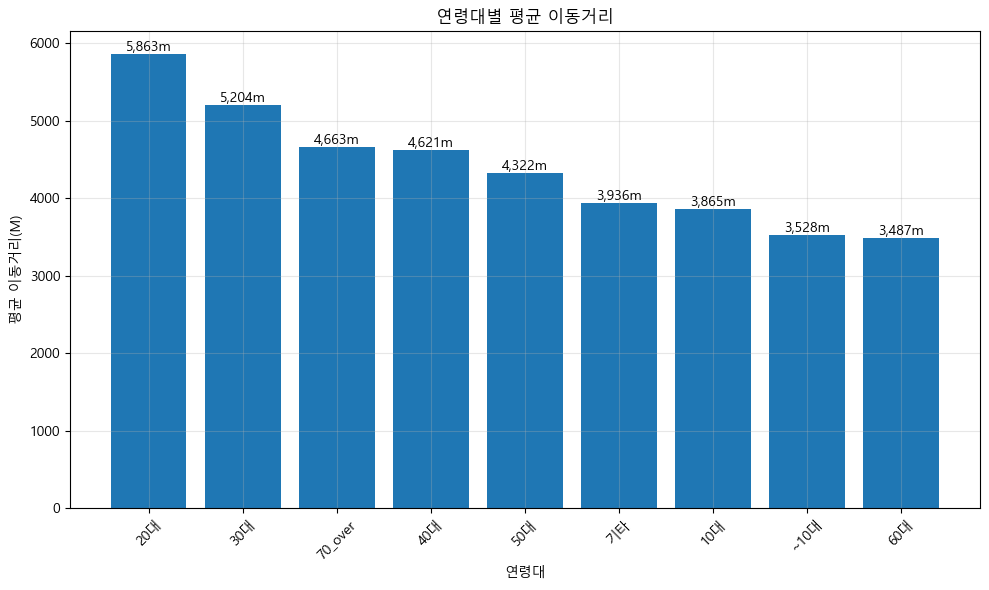

In [30]:
# 연령대별 이동거리 평균 계산
age_distance = data.groupby('연령대')['이동거리(M)'].agg(['mean', 'count', 'min', 'max']).round(2)
age_distance = age_distance.sort_values('mean', ascending=False)  # 평균 거리 기준 내림차순 정렬

print("=== 연령대별 이동거리 통계 ===")
print(age_distance)

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(age_distance.index, age_distance['mean'])
plt.title('연령대별 평균 이동거리')
plt.xlabel('연령대')
plt.ylabel('평균 이동거리(M)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# 평균값 표시
for i, v in enumerate(age_distance['mean']):
    plt.text(i, v, f'{v:,.0f}m', ha='center', va='bottom')

plt.tight_layout()
plt.show()

=== 연령대별 평균 이동거리 ===
연령대
10대        3865.396476
20대        5862.728863
30대        5203.797165
40대        4621.388943
50대        4322.495227
60대        3487.475794
70_over    4663.404079
~10대       3528.461268
Name: 이동거리(M), dtype: float64

기타 데이터 수: 315195

=== 변경 후 연령대별 분포 ===
연령대
20대        849330
30대        650473
40대        432447
50대        321364
60대        318051
~10대       171248
10대         47798
70_over     45084
Name: count, dtype: int64

=== 변경 후 연령대별 평균 이동거리 ===
            mean   count
연령대                     
10대      3870.38   47798
20대      6254.01  849330
30대      5204.13  650473
40대      4620.90  432447
50대      4321.43  321364
60대      2262.65  318051
70_over  4677.90   45084
~10대     3530.65  171248


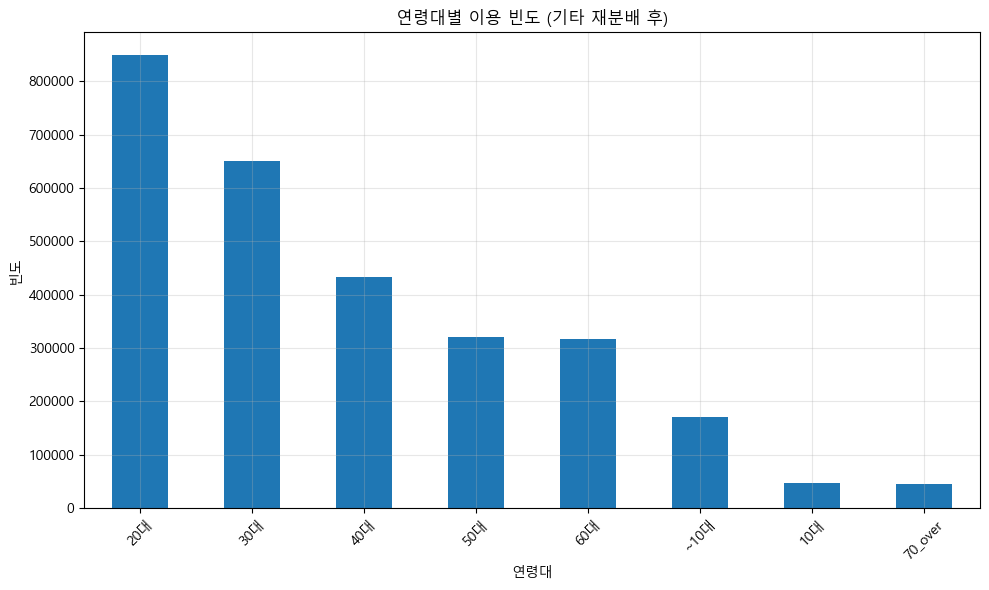

In [31]:
# 연령대별 평균 이동거리 계산
age_means = data[data['연령대'] != '기타'].groupby('연령대')['이동거리(M)'].mean()
print("=== 연령대별 평균 이동거리 ===")
print(age_means)

# 기타 데이터 추출
other_data = data[data['연령대'] == '기타'].copy()
print(f"\n기타 데이터 수: {len(other_data)}")

# 각 기타 데이터에 대해 가장 가까운 평균값을 가진 연령대 할당
def find_closest_age(distance):
    # 각 연령대 평균과의 차이 계산
    differences = abs(age_means - distance)
    # 가장 차이가 작은 연령대 반환
    return differences.idxmin()

# 기타 데이터의 연령대 업데이트
data.loc[other_data.index, '연령대'] = other_data['이동거리(M)'].apply(find_closest_age)

# 결과 확인
print("\n=== 변경 후 연령대별 분포 ===")
print(data['연령대'].value_counts())

# 변경 후 연령대별 평균 이동거리 확인
new_means = data.groupby('연령대')['이동거리(M)'].agg(['mean', 'count']).round(2)
print("\n=== 변경 후 연령대별 평균 이동거리 ===")
print(new_means)

# 시각화
plt.figure(figsize=(10, 6))
data['연령대'].value_counts().plot(kind='bar')
plt.title('연령대별 이용 빈도 (기타 재분배 후)')
plt.xlabel('연령대')
plt.ylabel('빈도')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
data['연령대'] = data['연령대'].replace({'~10대': '10대',})

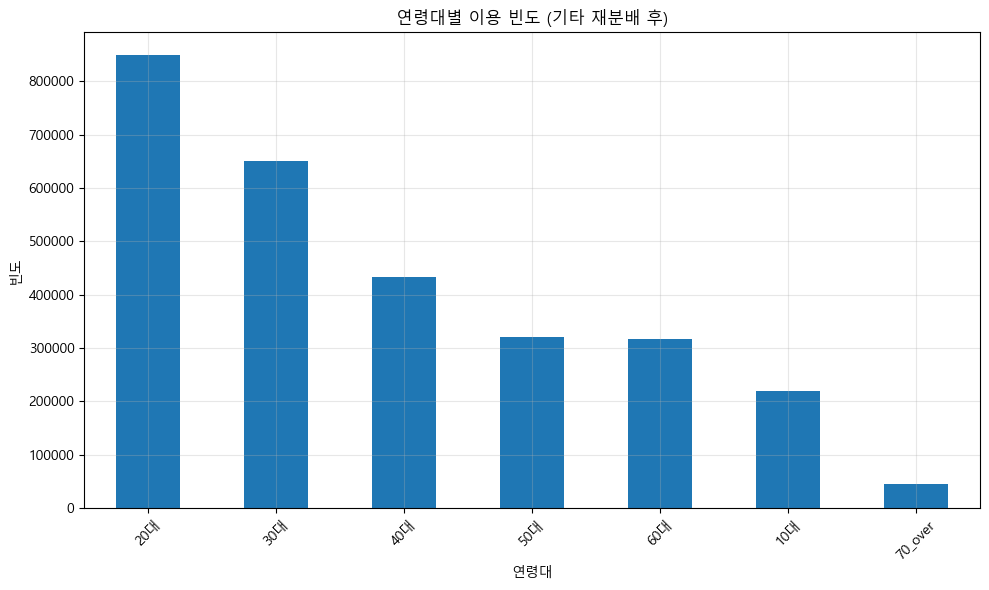

In [33]:
# 시각화
plt.figure(figsize=(10, 6))
data['연령대'].value_counts().plot(kind='bar')
plt.title('연령대별 이용 빈도 (기타 재분배 후)')
plt.xlabel('연령대')
plt.ylabel('빈도')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

누락된 날짜 확인

In [34]:
# 대여일자를 datetime 형식으로 변환 (형식 수정)
data['대여일자'] = pd.to_datetime(data['대여일자'].astype(str), format='%Y-%m-%d')

# 날짜 범위 확인
print("=== 대여일자 범위 ===")
print(f"시작일: {data['대여일자'].min()}")
print(f"종료일: {data['대여일자'].max()}")

# 전체 기간 생성
full_date_range = pd.date_range(start='2021-01-01', end='2024-12-31')

# 실제 데이터에 있는 날짜들
existing_dates = pd.to_datetime(data['대여일자'].unique())

# 누락된 날짜 확인
missing_dates = set(full_date_range) - set(existing_dates)

print(f"\n전체 기간 일수: {len(full_date_range)}")
print(f"데이터 있는 일수: {len(existing_dates)}")
print(f"누락된 일수: {len(missing_dates)}")

if len(missing_dates) > 0:
    print("\n=== 누락된 날짜 예시 (처음 10개) ===")
    print(sorted(list(missing_dates))[:10])

# 월별 데이터 수 확인
monthly_counts = data['대여일자'].dt.to_period('M').value_counts().sort_index()
print("\n=== 월별 데이터 수 ===")
print(monthly_counts)

=== 대여일자 범위 ===
시작일: 2021-01-01 00:00:00
종료일: 2024-12-31 00:00:00

전체 기간 일수: 1461
데이터 있는 일수: 1452
누락된 일수: 9

=== 누락된 날짜 예시 (처음 10개) ===
[Timestamp('2021-06-25 00:00:00'), Timestamp('2021-06-26 00:00:00'), Timestamp('2021-06-27 00:00:00'), Timestamp('2021-06-28 00:00:00'), Timestamp('2021-06-29 00:00:00'), Timestamp('2021-06-30 00:00:00'), Timestamp('2021-11-28 00:00:00'), Timestamp('2021-11-29 00:00:00'), Timestamp('2021-11-30 00:00:00')]

=== 월별 데이터 수 ===
대여일자
2021-01    17228
2021-02    23121
2021-03    30388
2021-04    34402
2021-05    35211
2021-06    33656
2021-07    56585
2021-08    54590
2021-09    55341
2021-10    53121
2021-11    31328
2021-12    28869
2022-01    26459
2022-02    25688
2022-03    39358
2022-04    50042
2022-05    54596
2022-06    48520
2022-07    66315
2022-08    61889
2022-09    72537
2022-10    71770
2022-11    67136
2022-12    42087
2023-01    38489
2023-02    48954
2023-03    71920
2023-04    71442
2023-05    79087
2023-06    81820
2023-07    73457
2023-08

In [35]:
# 대여일자를 datetime 형식으로 변환
data['대여일자'] = pd.to_datetime(data['대여일자'].astype(str), format='%Y-%m-%d')

# 전체 기간 생성
full_date_range = pd.date_range(start='2021-01-01', end='2024-12-31')

# 실제 데이터에 있는 날짜들
existing_dates = pd.to_datetime(data['대여일자'].unique())

# 누락된 날짜 확인
missing_dates = sorted(list(set(full_date_range) - set(existing_dates)))

print("=== 데이터 범위 ===")
print(f"시작일: {data['대여일자'].min()}")
print(f"종료일: {data['대여일자'].max()}")
print(f"\n전체 기간 일수: {len(full_date_range)}")
print(f"데이터 있는 일수: {len(existing_dates)}")
print(f"누락된 일수: {len(missing_dates)}")

print("\n=== 누락된 날짜 전체 목록 ===")
for date in missing_dates:
    print(date.strftime('%Y-%m-%d'))

# 누락된 날짜의 월별 분포
missing_months = pd.Series(missing_dates).dt.to_period('M').value_counts().sort_index()
print("\n=== 누락된 날짜의 월별 분포 ===")
print(missing_months)

=== 데이터 범위 ===
시작일: 2021-01-01 00:00:00
종료일: 2024-12-31 00:00:00

전체 기간 일수: 1461
데이터 있는 일수: 1452
누락된 일수: 9

=== 누락된 날짜 전체 목록 ===
2021-06-25
2021-06-26
2021-06-27
2021-06-28
2021-06-29
2021-06-30
2021-11-28
2021-11-29
2021-11-30

=== 누락된 날짜의 월별 분포 ===
2021-06    6
2021-11    3
Freq: M, Name: count, dtype: int64


이동거리를 이용하여 성별 결측치 채우기

In [42]:
# 변경 전 성별 분포 확인
print("=== 변경 전 성별 분포 ===")
print(data['성별'].value_counts(dropna=False))

# 성별 데이터 변경
data['성별'] = data['성별'].replace({
    'm': 'M',
    'f': 'F',
    'NaN': 'NA',
    '\\N': 'NA'
})

# nan 값을 'NA'로 변경
data['성별'] = data['성별'].fillna('NA')

# 변경 후 성별 분포 확인
print("\n=== 변경 후 성별 분포 ===")
print(data['성별'].value_counts(dropna=False))

# 유니크 값 확인으로 다른 값이 없는지 체크
print("\n=== 성별 고유값 ===")
print(data['성별'].unique())

=== 변경 전 성별 분포 ===
성별
M      1099036
F       834706
NaN     756629
\N      144704
m          400
f          320
Name: count, dtype: int64

=== 변경 후 성별 분포 ===
성별
M     1099436
NA     901333
F      835026
Name: count, dtype: int64

=== 성별 고유값 ===
['NA' 'M' 'F']


In [46]:
# 변경 전 성별 분포 확인
print("=== 변경 전 성별 분포 ===")
print(data['성별'].value_counts())

# 이동거리 구간 생성 (예: 1km 단위로)
data['거리구간'] = pd.cut(data['이동거리(M)'], 
                         bins=range(0, int(data['이동거리(M)'].max()) + 1000, 1000),
                         labels=[f"{i}~{i+1}km" for i in range(0, int(data['이동거리(M)'].max()), 1000)])

# 거리구간별 성별 분포 확인 (NA 제외)
distance_gender_dist = pd.crosstab(data['거리구간'], data['성별'])
distance_gender_dist = distance_gender_dist[['M', 'F']]  # NA 열 제외

# 전체 성비 계산 (기본값으로 사용)
total_ratio = distance_gender_dist.sum()
total_ratio = total_ratio / total_ratio.sum()

# 거리구간별 성비 계산
gender_ratios = distance_gender_dist.div(distance_gender_dist.sum(axis=1), axis=0)

print("\n=== 전체 성비 ===")
print(total_ratio)

# NA 값을 거리구간별 성비에 따라 랜덤 할당
np.random.seed(42)  # 재현성을 위한 시드 설정

def assign_gender(row):
    if row['성별'] == 'NA':
        distance_group = row['거리구간']
        try:
            # 해당 거리구간의 성비가 유효한 경우
            probabilities = gender_ratios.loc[distance_group]
            if not probabilities.isna().any():  # NaN이 없는 경우
                return np.random.choice(['M', 'F'], p=[probabilities['M'], probabilities['F']])
        except:
            pass
        # 문제가 있는 경우 전체 성비 사용
        return np.random.choice(['M', 'F'], p=[total_ratio['M'], total_ratio['F']])
    return row['성별']

# NA 값 변경
data['성별'] = data.apply(assign_gender, axis=1)

# 변경 후 성별 분포 확인
print("\n=== 변경 후 전체 성별 분포 ===")
print(data['성별'].value_counts())
print(f"변경 후 NA 수: {(data['성별'] == 'NA').sum()}")

# 거리구간 열 삭제
data = data.drop('거리구간', axis=1)

=== 변경 전 성별 분포 ===
성별
M     1099436
NA     901333
F      835026
Name: count, dtype: int64

=== 전체 성비 ===
성별
M    0.568342
F    0.431658
dtype: float64

=== 변경 후 전체 성별 분포 ===
성별
M    1611512
F    1224283
Name: count, dtype: int64
변경 후 NA 수: 0


특수결측치 제거

In [47]:
# 결측치 개수 확인
print("=== 결측치 개수 ===")
print(data.isnull().sum())

# 결측치 비율(%) 계산
print("\n=== 결측치 비율(%) ===")
print((data.isnull().sum() / len(data) * 100).round(2))

# 데이터 타입 확인
print("\n=== 데이터 타입 ===")
print(data.dtypes)

# 기본 정보 확인
print("\n=== 데이터 기본 정보 ===")
print(data.info())

# NA, null, NaN 등 다양한 형태의 결측값 확인
print("\n=== 특수한 결측값 확인 ===")
for column in data.columns:
    unique_vals = data[column].unique()
    special_vals = [val for val in unique_vals if isinstance(val, str) and val.upper() in ['NA', 'NAN', 'NULL', '\\N']]
    if special_vals:
        print(f"\n{column}의 특수 결측값:")
        print(special_vals)
        print(f"개수: {data[data[column].isin(special_vals)].shape[0]}")

=== 결측치 개수 ===
대여일자       0
대여소번호      0
대여소        0
대여구분코드     0
성별         0
연령대        0
이용건수       0
운동량        0
탄소량        0
이동거리(M)    0
이용시간(분)    0
dtype: int64

=== 결측치 비율(%) ===
대여일자       0.0
대여소번호      0.0
대여소        0.0
대여구분코드     0.0
성별         0.0
연령대        0.0
이용건수       0.0
운동량        0.0
탄소량        0.0
이동거리(M)    0.0
이용시간(분)    0.0
dtype: float64

=== 데이터 타입 ===
대여일자       datetime64[ns]
대여소번호               int64
대여소                object
대여구분코드             object
성별                 object
연령대                object
이용건수                int64
운동량                object
탄소량                object
이동거리(M)           float64
이용시간(분)             int64
dtype: object

=== 데이터 기본 정보 ===
<class 'pandas.core.frame.DataFrame'>
Index: 2835795 entries, 0 to 3114936
Data columns (total 11 columns):
 #   Column   Dtype         
---  ------   -----         
 0   대여일자     datetime64[ns]
 1   대여소번호    int64         
 2   대여소      object        
 3   대여구분코드   object        
 4   성별      

In [51]:
# 삭제 전 데이터 수 확인
print("=== 삭제 전 상태 ===")
print(f"전체 데이터 수: {len(data)}")

# 특수 결측치 개수 확인
print("\n=== 특수 결측치 개수 ===")
print("탄소량:")
print(data['탄소량'].value_counts().get('NA', 0), "개의 'NA'")
print(data['탄소량'].value_counts().get('\\N', 0), "개의 '\\N'")
print("\n운동량:")
print(data['운동량'].value_counts().get('NA', 0), "개의 'NA'")
print(data['운동량'].value_counts().get('\\N', 0), "개의 '\\N'")

# NA와 \N 값을 가진 행 제거
data = data[
    (~data['탄소량'].isin(['NA', '\\N'])) & 
    (~data['운동량'].isin(['NA', '\\N']))
]

# 숫자형으로 변환
data['탄소량'] = pd.to_numeric(data['탄소량'])
data['운동량'] = pd.to_numeric(data['운동량'])

# 삭제 후 상태 확인
print("\n=== 삭제 후 상태 ===")
print(f"남은 데이터 수: {len(data)}")

# 기본 통계 확인
print("\n=== 기본 통계 ===")
print("\n탄소량 통계:")
print(data['탄소량'].describe())
print("\n운동량 통계:")
print(data['운동량'].describe())

# 결측치 재확인
print("\n=== 결측치 확인 ===")
print(data[['탄소량', '운동량']].isnull().sum())

=== 삭제 전 상태 ===
전체 데이터 수: 2835795

=== 특수 결측치 개수 ===
탄소량:
0 개의 'NA'
1714 개의 '\N'

운동량:
0 개의 'NA'
1714 개의 '\N'

=== 삭제 후 상태 ===
남은 데이터 수: 2834081

=== 기본 통계 ===

탄소량 통계:
count    2.834081e+06
mean     1.128374e+00
std      1.245226e+00
min      0.000000e+00
25%      3.200000e-01
50%      6.700000e-01
75%      1.470000e+00
max      2.306000e+01
Name: 탄소량, dtype: float64

운동량 통계:
count    2.834081e+06
mean     1.992544e+02
std      1.188021e+05
min      0.000000e+00
25%      3.514000e+01
50%      7.465000e+01
75%      1.656900e+02
max      2.000001e+08
Name: 운동량, dtype: float64

=== 결측치 확인 ===
탄소량    0
운동량    0
dtype: int64


데이터 저장

In [52]:
# 저장하기 전 데이터 최종 확인
print("=== 저장할 데이터 정보 ===")
print(f"행 수: {len(data)}")
print(f"열 수: {len(data.columns)}")
print("\n컬럼 목록:")
print(data.columns.tolist())

# 데이터 미리보기
print("\n=== 데이터 미리보기 ===")
print(data.head())

# CSV 파일로 저장
output_path = "C:/T/processed_bike_data.csv"
data.to_csv(output_path, index=False, encoding='utf-8')

print(f"\n파일이 저장되었습니다: {output_path}")

# 저장된 데이터 검증
saved_data = pd.read_csv(output_path, encoding='utf-8')
print("\n=== 저장된 데이터 검증 ===")
print(f"저장된 데이터 행 수: {len(saved_data)}")
print(f"저장된 데이터 열 수: {len(saved_data.columns)}")

=== 저장할 데이터 정보 ===
행 수: 2834081
열 수: 11

컬럼 목록:
['대여일자', '대여소번호', '대여소', '대여구분코드', '성별', '연령대', '이용건수', '운동량', '탄소량', '이동거리(M)', '이용시간(분)']

=== 데이터 미리보기 ===
        대여일자  대여소번호                  대여소   대여구분코드 성별  연령대  이용건수     운동량   탄소량  \
0 2021-01-01    500  500. 어린이대공원역 3번출구 앞  일일권(회원)  M  20대     2  107.24  1.05   
4 2021-01-01    500  500. 어린이대공원역 3번출구 앞  일일권(회원)  M  20대     1   46.42  0.34   
5 2021-01-01    500  500. 어린이대공원역 3번출구 앞  일일권(회원)  M  30대     2   44.67  0.33   
7 2021-01-01    500  500. 어린이대공원역 3번출구 앞  정기권(회원)  F  20대     2   38.25  0.43   
9 2021-01-01    500  500. 어린이대공원역 3번출구 앞  정기권(회원)  F  40대     1   79.41  0.53   

   이동거리(M)  이용시간(분)  
0  4498.58       23  
4  1465.17        9  
5  1398.43       15  
7  1857.36       24  
9  2278.81       13  

파일이 저장되었습니다: C:/T/processed_bike_data.csv

=== 저장된 데이터 검증 ===
저장된 데이터 행 수: 2834081
저장된 데이터 열 수: 11
